# Geosoft Voxels

An important geoscience data structure is a voxel (voxset), which is a 3D cell-based model of the subsurface volume of part of the Earth. Voxel models are commonly used to represent some property of the subsurface in which the entire volume of interest is subdivided into cells, each with a value that represents a property of the cell volume. A voxel property can also be a vector quantity, in which case the property of a voxel cell will have a vector quantity defined by (vx, vy, vz).

We work with voxels using the ```Vox``` class and the ```Vox_display``` class.  The ```Vox``` class can be used to open a Geosoft voxel (or vector voxel) or create a new Geosoft voxel, and the ```Vox_display``` class can create a visualization of a voxel that can be placed in a 3D view.

## What You Will Learn

1. How to open an existing Geosoft voxel.
2. How to see the properties of a Geosoft Voxel.
3. How to view a Geosoft voxel.
4. How to open a vector voxel.
5. How to view a vector voxel as vector cones.
6. How to view a voxel in the interactive Geosoft 3D viewer.

> Some features in this notebook may require a Geosoft End-User License/Subscription.

## Python imports, GX context and get exrcise data from GitHub

In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.vox as gxvox
import geosoft.gxpy.vox_display as gxvoxd
import geosoft.gxpy.viewer as gxviewer
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.map as gxmap
from IPython.display import Image
import numpy as np

gxc = gx.GXpy()

url = 'https://github.com/GeosoftInc/gxpy/raw/master/examples/tutorial/Geosoft%20Voxels/'
vox_file = 'rjsmith_voxi_density.geosoft_voxel'
gxu.url_retrieve(url + vox_file)
gxu.url_retrieve(url + vox_file + '.xml')
vectorvox_file = 'mvi.geosoft_vectorvoxel'
gxu.url_retrieve(url + vectorvox_file)
gxu.url_retrieve(url + vectorvox_file + '.xml')

'mvi.geosoft_vectorvoxel.xml'

## Voxel properties

In [2]:
# open the vox
with gxvox.Vox.open(vox_file) as vox:
    
    # show some of the vox properties
    print(vox.name)
    print('dimensions (nx, ny, nz):', vox.nx, vox.ny, vox.nz)
    print('coordinate system:', vox.coordinate_system)
    print('surface extent:', vox.extent_2d)
    print('volume extent:', vox.extent)
    print('origin location:', (vox.origin_x, vox.origin_y, vox.origin_z))
    print('unit of measure:', vox.unit_of_measure)
    print('depth cell sizes in', vox.coordinate_system.unit_of_measure, ', from the bottom:')
    for cell in vox.cells_z:
        print('\t', cell)

rjsmith_voxi_density
dimensions (nx, ny, nz): 143 148 29
coordinate system: WGS 84 / MGA zone 50
surface extent: (501749.99999999994, 6466950.000000001, 508899.99999999994, 6474350.000000001)
volume extent: (501749.99999999994, 6466950.000000001, -1569.558498818539, 508899.99999999994, 6474350.000000001, 358.0899999999994)
origin location: (501774.99999999994, 6466975.000000001, -1490.2937396030375)
unit of measure: g/cc
depth cell sizes in m , from the bottom:
	 158.529518431
	 146.78659114
	 135.913510315
	 125.845842884
	 116.523928596
	 107.892526478
	 99.9004874796
	 92.50045137
	 85.6485660834
	 79.304227855
	 73.4298406064
	 67.9905931541
	 62.9542529205
	 58.2909749264
	 53.9731249318
	 49.9751156776
	 46.273255257
	 42.8456067195
	 39.6718580736
	 36.73320192
	 34.012224
	 31.4928
	 29.16
	 27.0
	 25.0
	 25.0
	 25.0
	 25.0
	 25.0


### Voxels referenced by elevation, or by depth

The vertical dimension of a voxel (the 'z' dimension), can be referenced by elevation or by depth.  If referenced by elevation, which is the default, the positive z direction is up and values can be assumed to represent elevations relative to the vertical reference datum of the coordinate system. Also, when referenced by elevation, the voxel origin is on the bottom slice of the voxel and z arrays of voxel cells sizes or locations start at the bottom and sequence up, in the positive direction.

You can also choose to work with a voxel by depth, either by setting the ```depth=True``` parameter when a new voxel is created, or an existing voxel is openned, or by changing the ```is_depth``` property to ```True```.

For example, here we change the reference to depth and print depth-based properties. Note the z property differences from the example above.

In [3]:
# open the vox
with gxvox.Vox.open(vox_file, depth=True) as vox:
    
    # show some of the vox properties
    print(vox.name, 'properties by depth...')
    print('volume extent:', vox.extent)
    print('origin location:', (vox.origin_x, vox.origin_y, vox.origin_z))
    print('depth cell sizes in', vox.coordinate_system.unit_of_measure, ', from the top:')
    for cell in vox.cells_z:
        print('\t', cell)

rjsmith_voxi_density properties by depth...
volume extent: (501749.99999999994, 6466950.000000001, -358.0899999999994, 508899.99999999994, 6474350.000000001, 1569.558498818539)
origin location: (501774.99999999994, 6466975.000000001, -345.58999999999912)
depth cell sizes in m , from the top:
	 25.0
	 25.0
	 25.0
	 25.0
	 25.0
	 27.0
	 29.16
	 31.4928
	 34.012224
	 36.73320192
	 39.6718580736
	 42.8456067195
	 46.273255257
	 49.9751156776
	 53.9731249318
	 58.2909749264
	 62.9542529205
	 67.9905931541
	 73.4298406064
	 79.304227855
	 85.6485660834
	 92.50045137
	 99.9004874796
	 107.892526478
	 116.523928596
	 125.845842884
	 135.913510315
	 146.78659114
	 158.529518431


## View the voxel

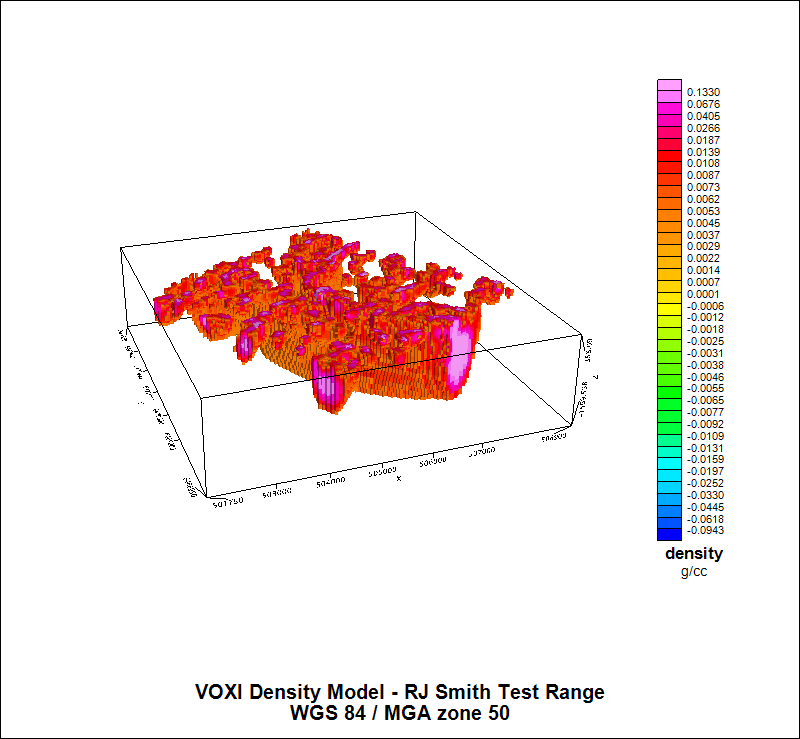

In [4]:
# open the vox
with gxvox.Vox.open(vox_file) as vox:
    
    # create a display instance
    with gxvoxd.Vox_display.new(vox) as voxd:
        
        # limit the display to densities above 0.005 g/cc
        voxd.shell_limits = (0.005, None)
        
        # Create a title and include the coordinate system.
        title = "VOXI Density Model - RJ Smith Test Range" + '\n' + str(vox.coordinate_system)
        
        # create a figure map for the vox. This creates a 3D view that is placed on a map and annotated 
        # to create a default presentation figure. By not specifying a name for the map a temporary map
        # is created only for the life of this Python session.
        vox_map_file = voxd.figure_map(title=title, legend_label='density\ng/cc').file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

## New voxel from a numpy data array

A simple way to create a new voxel is to collect the voxel data into a 3D numpy array in which each dimension represents the cells in the X, Y and Z spatial directions. Data in an array is organized by X, then by Y, and lastly by Z, which results in data indexing being in the reverse order.  For example, a voxel that has spatial dimensions (nx, ny, nz) of (100, 65, 20) will be stored in a 3d array with shape (20, 65, 100).

Note also that the Z direction is positive up, which means that a voxel origin, which is the center of the first cell (cell[0, 0, 0]) is the at the center of the deepest, lower-left cell in the voxel.

In this example we will start with a simple indexed data array in which the value of each cell is the Z index.

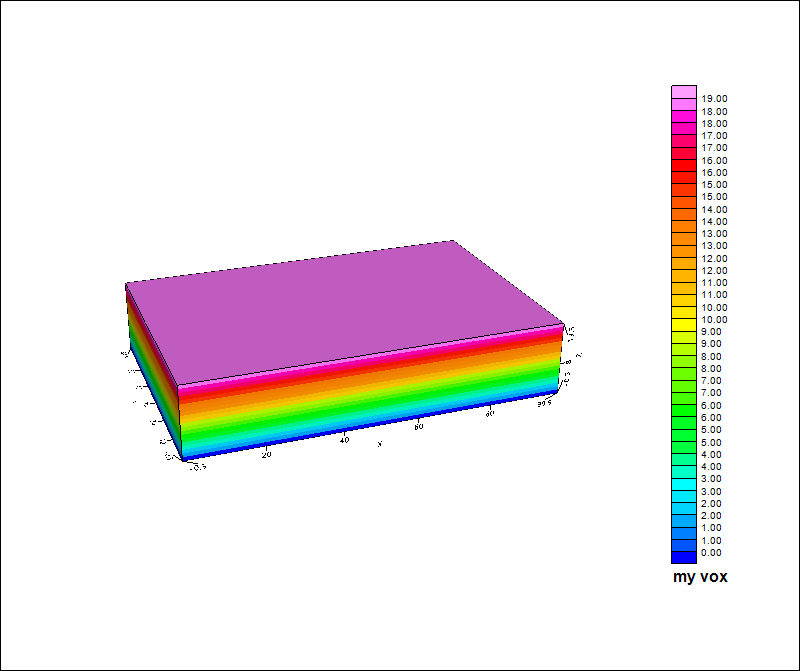

In [5]:
# create a 3D data array in which each z slice is set to the z index
data = np.empty((20, 65, 100), dtype=np.float64)
for i in range(data.shape[0]):
    data[i, :, :] = i
    
    
# create a new voxel, and display
with gxvox.Vox.new(name='my vox', data=data, overwrite=True) as vox:
    vox_map_file = gxvoxd.Vox_display.new(vox).figure_map().file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

## Locate a new voxel spatially

In the last example we created a voxel without true spatial dimensions. In this example we will scale the same voxel to have true spatial dimensions and be located at a known location on Earth. For this example we will assume that the voxels are 50 m square cells and the model is located on the NAD83 datum using projection UTM zone 19N.

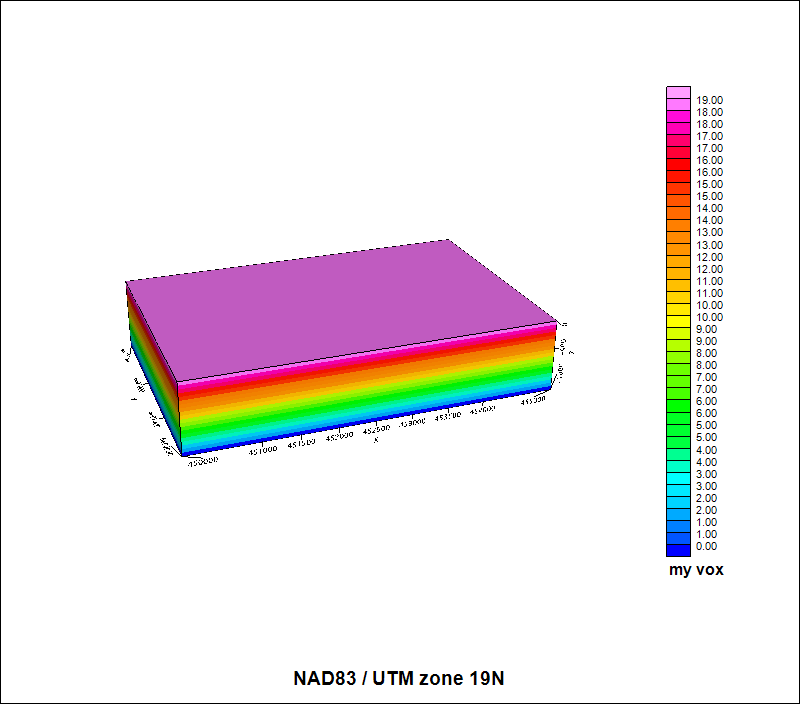

In [6]:
# create voxel, and display
with gxvox.Vox.new(name='my vox', 
                   data=data, 
                   overwrite=True, 
                   origin=(450025, 6800025, -975), # the origin is the center of the bottom cell[0, 0, 0]
                   cell_size=50, 
                   coordinate_system='NAD83 / UTM zone 19N') as vox:
    vox_map_file = gxvoxd.Vox_display.new(vox).figure_map(title=str(vox.coordinate_system)).file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

# Define a variable cell size

Voxel cell sizes may vary along any dimension. For example, when defining a voxel model for geophysical modelling one might increase the vertical size of voxel as a function of depth.  To do this you can provide the cell dimensions as an array of dimensions along any, or all axis. In this example we will increase the cell size as a function of depth, with each deeper cell being 10% larger.

In this example we will work referencing depth rather than elevation as it makes the cell depth calculation simpler.

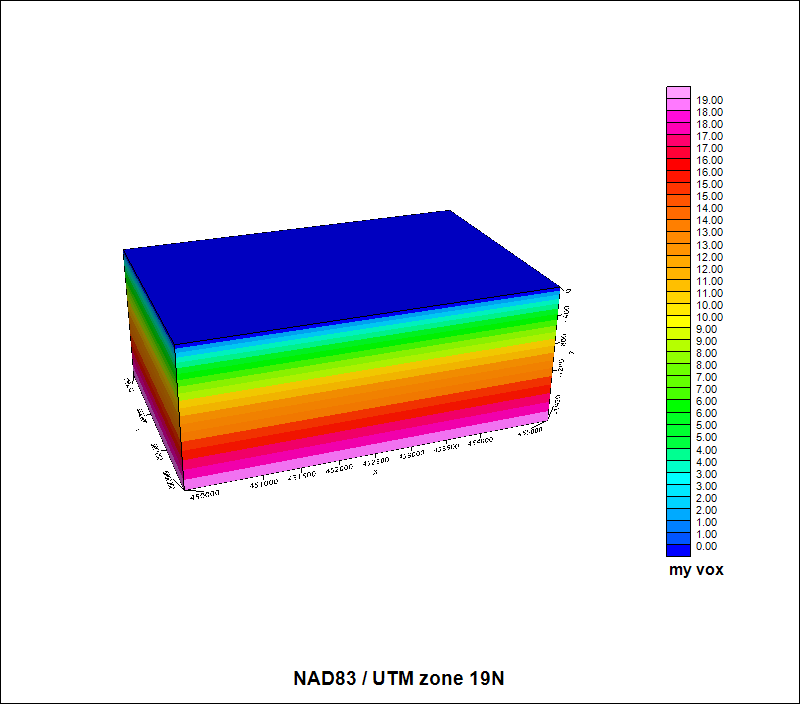

In [7]:
nz = data.shape[0]
cell = 50

# create a z cell dimension increasing 10% as a function of depth (positive down)
z_cell = [cell] * nz
for i in range(1, nz):
    z_cell[i] = cell * (1. + i * 0.1)
    
# create voxel, and display
with gxvox.Vox.new(name='my vox', 
                   data=data, 
                   overwrite=True,
                   depth=True, # work using z as depth
                   origin=(450025, 6800025, 25), # the origin is the center of the top cell when working from depth 
                   cell_size=(cell, cell, z_cell), # the cell size array defines variable z cell sizes
                   coordinate_system='NAD83 / UTM zone 19N') as vox:
    vox_map_file = gxvoxd.Vox_display.new(vox).figure_map(title=str(vox.coordinate_system)).file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

## Vector Voxel

Voxel cells may also store a vector value defined by a (vx, vy, vz) for each cell. For example, Geosoft MVI models define model magnetization as a vector quantity. Vector voxel files have extension `.geosoft_vectorvoxel`.

The `is_vectorvox` property of a Vox instance that holds a vector voxel will be True, and the Numpy array returned by the Vox.np() method will have 4 dimensions with the last dimension being 3.

Displaying a vector voxel will, by default, display the Vox as scalar colour based on amplitude, as follows.

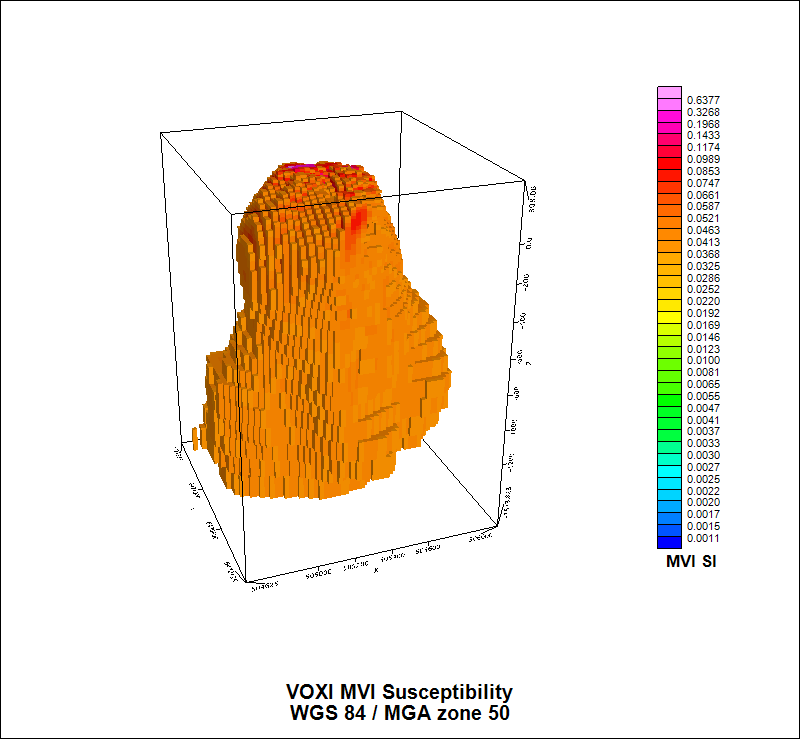

In [8]:
# open the vector voxel
with gxvox.Vox.open(vectorvox_file) as vox:
    
    # create a display instance
    with gxvoxd.Vox_display.new(vox) as voxd:
        
        # limit the display to MVI susceptibility above 0.01 SI
        voxd.shell_limits = (0.04, None)
        
        # Create a title and include the coordinate system.
        title = "VOXI MVI Susceptibility" + '\n' + str(vox.coordinate_system)
        
        # create a figure map for the vox.
        vox_map_file = voxd.figure_map(title=title, legend_label='MVI SI').file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

## Display a vector voxel as vector cones

Vector voxels can also be displayed as cones that provide a visualization of the vector direction.  In this case the cone indicates the direction of magnetization in the MVI model.

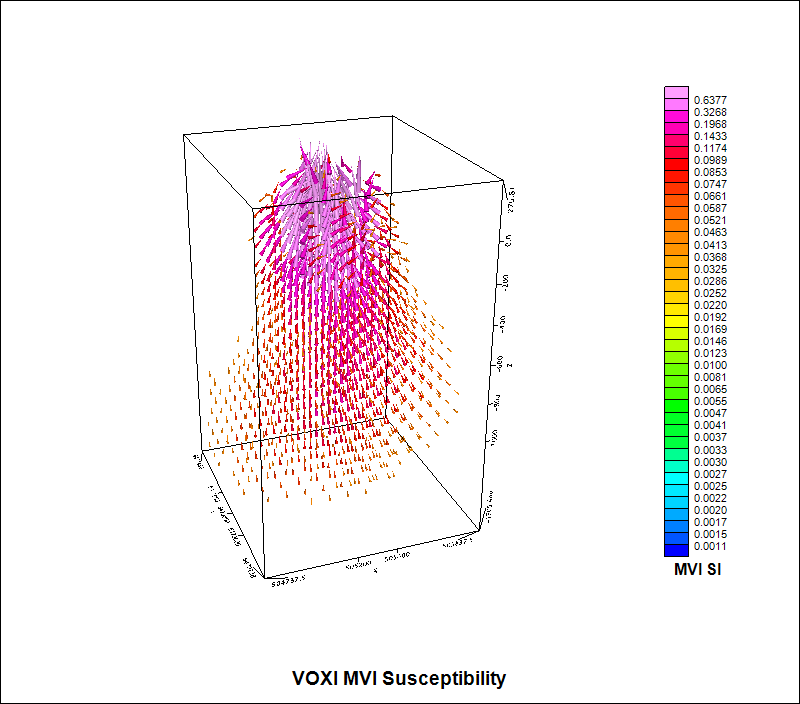

In [9]:
# open the vector voxel
with gxvox.Vox.open(vectorvox_file) as vox:
    
    # create a display instance, setting vector=True to create a cone vector rendering in 3D
    with gxvoxd.Vox_display.new(vox, vector=True) as voxd:
        
        # limit the display to MVI susceptibility above 0.04 SI
        voxd.shell_limits = (0.04, None)
        
        # set the vector specifications
        voxd.vector_cone_specs = (3, None, None, 1000)
        
        # Create a title and include the coordinate system.
        title = "VOXI MVI Susceptibility"
        
        # create a figure map for the vox.
        vox_map_file = voxd.figure_map(title=title, legend_label='MVI SI').file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

## Show a voxel in the Geosoft 3D viewer

To show a voxel in the Geosoft viewer you only need to create a ```View_3d``` instance in which to place the ```Vox_display``` instance.  

In this example the ```View_3d``` instance is saved to a temporary file with extension ```geosoft_3dv```, which will only exist during the life of the Geosoft context. If you would like the ```geosoft_3dv``` file to persist you must provide a ```file_name=``` parameter in the ```gxview.View_3d.new()``` statement.

In [10]:
# create a display instance
with gxvoxd.Vox_display.new(gxvox.Vox.open(vectorvox_file), vector=True) as voxd:

    # limit the display to MVI susceptibility above 0.01 SI
    voxd.shell_limits = (0.04, None)

    # set the vector specifications
    voxd.vector_cone_specs = (3, None, None, 1000)

    # create a temporaty 3D view file
    with gxview.View_3d.new() as v3d:
        v3d_file = v3d.file_name
        gxgroup.Vox_display_group.new(v3d, voxd)

gxviewer.view_document(v3d_file, wait_for_close=False)